<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_8_Comparar_regresi%C3%B3n_lineal_simple_y_polinomica_con_datos_FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 8. Comparar regresiones lineal simple  y polinómica con datos de FIFA

# Objetivo

Contruir modelos de regresión lineal simple y polinómica con la finalidad de evaluar la métrica R Square y determinar la utilidad de las predicciones en cada modelo.





# Descripción

* Cargar librerías
* Cargar datos
* Identificar variables de interés: variable independiente y la variable dependiente de los datos
* Construir datos de entrenamiento
* Construir datos de validación
* Modelo lineal simple
  * Construir el modelo 
  * Evaluar el modelo con R Square o coeficiente de determinación
  * Interpretar el modelo
  * Predicciones 
* Modelo polinómico de segunda potencia  
  * Construir el modelo polinómico de segunda potencia
  * Evaluar el modelo con R Square o coeficiente de determinación
  * Interpretar el modelo
  * Predicciones 
* Modelo polinómico de quinta potencia    
  * Construir un modelo polinómico de quinta potencia
  * Evaluar el moldeo con R Square o coeficiente de determinación
  * Interpretar el modelo
  * Predicciones 
* Interpretacicón del caso  

# Desarrollo

## Cargar librerías

In [201]:

import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import  pearsonr # Para correlación
from sklearn.linear_model import LinearRegression # Para regresión
from sklearn.model_selection import train_test_split # Partir datos
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score # R Square
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import statsmodels.formula.api as smf




## Cargar los datos

In [202]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.fifa.csv", encoding= 'unicode_escape')
datos[['Overall', 'Valor']]



,Overall,Valor
0,94,110500000
1,94,77000000
2,92,118500000
3,91,72000000
4,91,102000000
...,...,...
17950,47,60000
17951,47,60000
17952,47,60000
17953,47,60000


Las variables de interés son Overall como variable independiente que significa el valor cuantitativo entre 0 y 100 de un jugador de futbol a nivel internacional y la variable Valor que es el estimado económico que vale un jugador de fútbol a nivel mundial



In [203]:
datos[['Overall', 'Valor']].describe()

,Overall,Valor
count,17955.000000,1.795500e+04
mean,66.228237,2.444530e+06
std,6.921015,5.626715e+06
min,46.000000,1.000000e+04
25%,62.000000,3.250000e+05
50%,66.000000,7.000000e+05
75%,71.000000,2.100000e+06
max,94.000000,1.185000e+08


## Diagrama de dispersión de los datos

Se muestra el diagrama de dispersión con todo el conjunto de datos

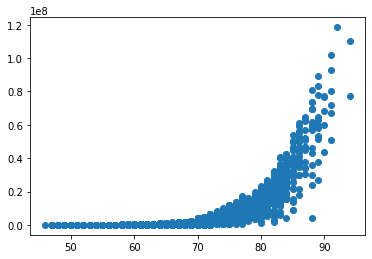

In [204]:
from matplotlib import pyplot as plt
 
# Convertirlo a arreglos independiente 
Overall = datos['Overall'].values.reshape(-1, 1) # Variable independiente
Valor = datos['Valor'].values.reshape(-1, 1) # Variable dependiente
plt.scatter(x,y)

## Construir datos de entrenamiento y validación

In [205]:
Overall = datos['Overall']
Valor = datos['Valor']


entrena_Overall, valida_Overall, entrena_Valor, valida_Valor = train_test_split(
                                        Overall.values.reshape(-1,1),
                                        Valor.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 2021,
                                        shuffle      = True
                                    )



### Datos de entrenamiento

In [206]:
entrenamiento = pd.DataFrame(np.concatenate((entrena_Overall, entrena_Valor), axis=1))
entrenamiento.columns = ['Overall', 'Valor']
entrenamiento

,Overall,Valor
0,49,40000
1,59,220000
2,53,90000
3,69,140000
4,60,290000
...,...,...
14359,60,325000
14360,57,220000
14361,73,3700000
14362,52,110000


### Datos de validación

In [207]:
validacion = pd.DataFrame(np.concatenate((valida_Overall, valida_Valor), axis=1))
validacion.columns = ['Overall', 'Valor']
validacion

,Overall,Valor
0,75,7500000
1,62,450000
2,63,400000
3,74,5000000
4,66,400000
...,...,...
3586,70,1300000
3587,64,500000
3588,62,325000
3589,60,210000


### Diagrama de dispersión con datos de entrenamiento

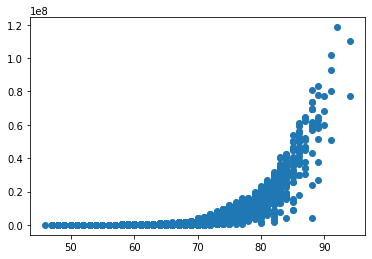

In [266]:
Overall = entrenamiento['Overall'].values.reshape(-1, 1) # Variable independiente
Valor = entrenamiento['Valor'].values.reshape(-1, 1) # Variable dependiente
plt.scatter(x,y)

## Modelo de regresión lineal simple



### Construyendo el modelo de regresión lineal simple

In [267]:
modelo_lin = LinearRegression()
modelo_lin.fit(X = entrena_Overall.reshape(-1, 1), y = entrena_Valor)

y_pred = modelo_lin.predict(Overall)

### Evaluando el modelo de regresión lineal simple

In [254]:
print("Coeficiente de la intercepción:", modelo_lin.intercept_)
print("Coeficiente de la pendiente", modelo_lin.coef_)
print("Coeficiente de determinación R^2 o R Square:", modelo_lin.score(X = entrena_Overall, y = entrena_Valor))

Coeficiente de la intercepción: [-31818186.001252]
Coeficiente de la pendiente [[517268.60261868]]
Coeficiente de determinación R^2 o R Square: 0.3931398886597335


Se construye la recta de regresión con los datos de entrenamiento y el modelo construído a partir de estos datos.

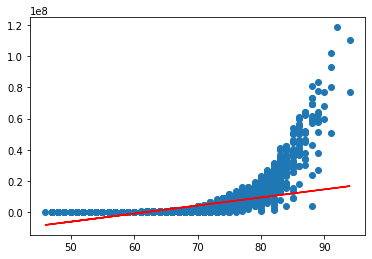

In [268]:
plt.scatter(x, y)
plt.plot(Overall, y_pred, color='r')
plt.show()

### Interpretar el modelo de regresión lineal simple

En la gráfica de dispersión de las variables Overall y Valor se observa una relación entre las variables de manera curva o polinómica y poco lineal.

El modelo de regresión lineal simple presenta un valor de R Square de 39.31%, significa que la variable Overall representa ese porcentaje sobre la variable Valor.

Si hay cantidades de Overall por debajo de 60 o aproximado menor que 60 cualquier predicción sale negativa.

#### Predicciones regresión lineal simple

Se elige algun valor del conjunto de datos de validación para comparar el valor real con el valor de la predicción con el modelo de regresión lineal simple.

Se elige el registro 10, 500 y 1000 y del conjunto de datos de validacion.



In [269]:

registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred_lin = modelo_lin.predict([[a_predecir]])
pred_lin
print("La predición con el modelo lineal simple de un valor de ", a_predecir, " es de ", float(pred_lin), " la real conforme a datos de validación es de: ", validacion.loc[registro,'Valor'])


Overall        57
Valor      160000
Name: 10, dtype: int64
57
La predición con el modelo lineal simple de un valor de  57  es de  -2333875.6519870013  la real conforme a datos de validación es de:  160000


In [270]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred_lin = modelo_lin.predict([[a_predecir]])
pred_lin
print("La predición con el modelo lineal simple de un valor de ", a_predecir, " es de ", float(pred_lin), " la real conforme a datos de validación es de: ", validacion.loc[registro,'Valor'])

Overall          79
Valor      11500000
Name: 500, dtype: int64
79
La predición con el modelo lineal simple de un valor de  79  es de  9046033.60562405  la real conforme a datos de validación es de:  11500000


In [271]:
registro = 1000
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']


print(a_predecir)
pred_lin = modelo_lin.predict([[a_predecir]])
pred_lin
print("La predición con el modelo lineal simple de un valor de ", a_predecir, " es de ", float(pred_lin), " la real conforme a datos de validación es de: ", validacion.loc[registro,'Valor'])

Overall        58
Valor      230000
Name: 1000, dtype: int64
58
La predición con el modelo lineal simple de un valor de  58  es de  -1816607.0493683182  la real conforme a datos de validación es de:  230000


## Modelo polinómico de segundo nivel

Se crea un modelo polinómico con los mismos datos de entremiento y evaluar el R Square así como las predicciones con los datos de validación.

primero se crea una variable polyn que tiene características de una ecuación se segundo nivel.


In [272]:
from sklearn.preprocessing import PolynomialFeatures
 
polyn = PolynomialFeatures(degree=2)

x_poly = polyn.fit_transform(Overall)

print(Overall)
print(x_poly)

[[49]
 [59]
 [53]
 ...
 [73]
 [52]
 [69]]
[[1.000e+00 4.900e+01 2.401e+03]
 [1.000e+00 5.900e+01 3.481e+03]
 [1.000e+00 5.300e+01 2.809e+03]
 ...
 [1.000e+00 7.300e+01 5.329e+03]
 [1.000e+00 5.200e+01 2.704e+03]
 [1.000e+00 6.900e+01 4.761e+03]]


Luego se crea el modelo de regresión polinomial de segundo nivel


[[49]
 [59]
 [53]
 ...
 [73]
 [52]
 [69]]
[[6352454.74800411]
 [-891369.42030916]
 [2261636.76331106]
 ...
 [5673313.18720078]
 [3135180.21981338]
 [1808875.72277549]]


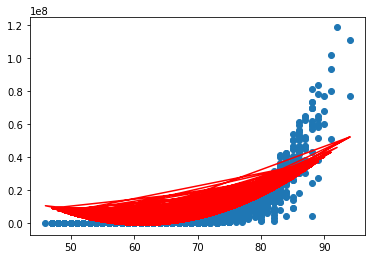

RMSE: 2796715.519337346
R2: 0.7594680604382035


In [276]:
modelo_pol2 = LinearRegression()
modelo_pol2.fit(x_poly, Valor)

y_pred = modelo_pol2.predict(x_poly)
print(Overall)
print(y_pred)

 
plt.scatter(Overall, Valor)
plt.plot(Overall, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(Valor,y_pred))
r2 = r2_score(Valor,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

El valor de R Square en el modelo polinómico de segundo nivel es del 75.94% en comparación con el modelo de regresión lineal simple de 39.31% es mucho mayor lo que representa una predicción más util y con mayor representatividad.



## Predicciones con modelo de regresió polinomila de segundo nivel


In [279]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print(pred2)

Overall        57
Valor      160000
Name: 10, dtype: int64
57
[[-238130.1315583]]


In [280]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']
print(a_predecir)
pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print(pred2)

Overall          79
Valor      11500000
Name: 500, dtype: int64
79
[[14453190.17725804]]


In [281]:
# registro = 500
# print(validacion.loc[registro])

a_predecir = 85
print(a_predecir)
pred2 = modelo_pol2.predict(polyn.fit_transform([[a_predecir]]))
print(pred2)

85
[[26812932.11941853]]


## Modelo polinómico de quinto nivel



In [283]:
polyn = PolynomialFeatures(degree=5)

x_poly = polyn.fit_transform(Overall)

print(Overall)
print(x_poly)

[[49]
 [59]
 [53]
 ...
 [73]
 [52]
 [69]]
[[1.00000000e+00 4.90000000e+01 2.40100000e+03 1.17649000e+05
  5.76480100e+06 2.82475249e+08]
 [1.00000000e+00 5.90000000e+01 3.48100000e+03 2.05379000e+05
  1.21173610e+07 7.14924299e+08]
 [1.00000000e+00 5.30000000e+01 2.80900000e+03 1.48877000e+05
  7.89048100e+06 4.18195493e+08]
 ...
 [1.00000000e+00 7.30000000e+01 5.32900000e+03 3.89017000e+05
  2.83982410e+07 2.07307159e+09]
 [1.00000000e+00 5.20000000e+01 2.70400000e+03 1.40608000e+05
  7.31161600e+06 3.80204032e+08]
 [1.00000000e+00 6.90000000e+01 4.76100000e+03 3.28509000e+05
  2.26671210e+07 1.56403135e+09]]


[[49]
 [59]
 [53]
 ...
 [73]
 [52]
 [69]]
[[  54360.40926212]
 [ 244354.83312368]
 [  88575.94737327]
 ...
 [3787924.14516294]
 [  65532.12605059]
 [1442314.34486949]]


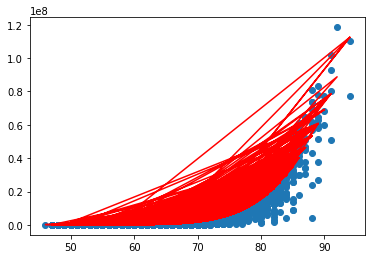

RMSE: 1791820.4787536587
R2: 0.9012663573094013


In [285]:
modelo_pol5 = LinearRegression()
modelo_pol5.fit(x_poly, Valor)

y_pred = modelo_pol5.predict(x_poly)
print(Overall)
print(y_pred)

 
plt.scatter(Overall, Valor)
plt.plot(Overall, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(Valor,y_pred))
r2 = r2_score(Valor,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

El valor de R Square en el modelo polinómico de quinto nivel esde 90.12% mayor que el valor del R Square del modelo polinómioc de egundo nivel con 75.94% en comparación con el modelo de regresión lineal simple de 39.31% es mucho mayor lo que representa una predicción más util y con mayor representatividad.

## Predicciones con el modelo de regresión polinómico de quinto nivel


In [291]:
registro = 10
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']

print(a_predecir)
pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print(pred5)

Overall        57
Valor      160000
Name: 10, dtype: int64
57
[[196483.46624629]]


In [292]:
registro = 500
print(validacion.loc[registro])

a_predecir = validacion.loc[registro,'Overall']
print(a_predecir)
pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print(pred5)

Overall          79
Valor      11500000
Name: 500, dtype: int64
79
[[12940891.80597259]]


In [295]:
# registro = 500
# print(validacion.loc[registro])

a_predecir = 85
print(a_predecir)
pred5 = modelo_pol5.predict(polyn.fit_transform([[a_predecir]]))
print(pred5)

85
[[34733265.99466695]]


# Interpretación de todo el caso

Sus proias palabras